# Day 7 - Part 1

In the bag DAG, how many nodes are ancestors of the gold bag node?

In [2]:
rules_str = """light red bags contain 1 bright white bag, 2 muted yellow bags.
dark orange bags contain 3 bright white bags, 4 muted yellow bags.
bright white bags contain 1 shiny gold bag.
muted yellow bags contain 2 shiny gold bags, 9 faded blue bags.
shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags.
dark olive bags contain 3 faded blue bags, 4 dotted black bags.
vibrant plum bags contain 5 faded blue bags, 6 dotted black bags.
faded blue bags contain no other bags.
dotted black bags contain no other bags."""

In [84]:
rules = [r.strip() for r in rules_str.split('.') if r.strip()]
rules

['light salmon bags contain 5 dotted olive bags, 4 wavy lavender bags',
 'dark purple bags contain 5 striped maroon bags, 1 wavy maroon bag',
 'muted lime bags contain 4 drab lavender bags, 1 clear orange bag, 2 striped black bags',
 'light green bags contain 5 dull gray bags, 3 dark crimson bags',
 'bright violet bags contain 1 bright purple bag',
 'dotted magenta bags contain 2 wavy beige bags, 1 dotted bronze bag',
 'wavy bronze bags contain 4 clear fuchsia bags',
 'bright plum bags contain 2 dim violet bags',
 'shiny yellow bags contain 5 clear violet bags, 3 drab maroon bags',
 'pale tomato bags contain 3 bright aqua bags',
 'light chartreuse bags contain 3 vibrant fuchsia bags',
 'mirrored blue bags contain 2 pale aqua bags',
 'muted maroon bags contain 3 muted indigo bags, 1 vibrant gold bag',
 'clear green bags contain 4 dotted beige bags',
 'muted indigo bags contain 1 dull green bag',
 'faded orange bags contain 1 shiny gold bag, 4 dim tomato bags',
 'posh purple bags contain

In [13]:
def parse_lhs(lhs):
    return ' '.join(lhs.split()[:-1])

def parse_rhs(rhs):
    children = rhs.split(', ')
    coded_rules = []
    for child in children:
        tokens = child.split()
        k, color = tokens[0], ' '.join(tokens[1:-1])
        coded_rules.append({'k':k,'color':color})
    return coded_rules

def parse_rule(rule_str):
    lhs, rhs = rule.split('contain')
    parent_color = parse_lhs(lhs)
    coded_rules = parse_rhs(rhs)
    return parent_color, coded_rules
    
for rule in rules:
    print(rule)
    print(parse_rule(rule))
    print()

light red bags contain 1 bright white bag, 2 muted yellow bags
('light red', [{'k': '1', 'color': 'bright white'}, {'k': '2', 'color': 'muted yellow'}])

dark orange bags contain 3 bright white bags, 4 muted yellow bags
('dark orange', [{'k': '3', 'color': 'bright white'}, {'k': '4', 'color': 'muted yellow'}])

bright white bags contain 1 shiny gold bag
('bright white', [{'k': '1', 'color': 'shiny gold'}])

muted yellow bags contain 2 shiny gold bags, 9 faded blue bags
('muted yellow', [{'k': '2', 'color': 'shiny gold'}, {'k': '9', 'color': 'faded blue'}])

shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags
('shiny gold', [{'k': '1', 'color': 'dark olive'}, {'k': '2', 'color': 'vibrant plum'}])

dark olive bags contain 3 faded blue bags, 4 dotted black bags
('dark olive', [{'k': '3', 'color': 'faded blue'}, {'k': '4', 'color': 'dotted black'}])

vibrant plum bags contain 5 faded blue bags, 6 dotted black bags
('vibrant plum', [{'k': '5', 'color': 'faded blue'}, {'k': '6', 'c

In [14]:
import networkx as nx
from collections import defaultdict

In [85]:
# How many bag colors can eventually contain at least one shiny gold bag?
# >>  At least for part one, don't need to register all combinatorics, just the color relationships

class BagGraphByColors:
    def __init__(self):
        self.g = nx.DiGraph()
        #self.bags_by_color = defaultdict(list)
    def register_rule(self, rule):
        parent, children = rule
        for child in children:
            k=child['k']
            if k == 'no':
                k=0
            self.g.add_edge(parent, child['color'], k=k)
        
bg = BagGraphByColors()
for rule in rules:
    #print('##',rule)
    bg.register_rule( parse_rule(rule) )

In [86]:
import matplotlib.pyplot as plt

layout = nx.spring_layout(bg.g)
nx.draw(bg.g, pos = layout, alpha = .3)
nx.draw_networkx_labels(bg.g, pos=layout)
plt.show()

KeyboardInterrupt: 

In [29]:
from networkx.algorithms.dag import ancestors

queue = ancestors(bg.g, 'shiny gold')
#visited = []

#while queue
#    parent = 
queue

{'bright white', 'dark orange', 'light red', 'muted yellow'}

In [87]:
with open('input.txt','r') as f:
    rules_str = f.read()

rules = [r.strip() for r in rules_str.split('.') if r]

bg = BagGraphByColors()
for rule in rules:
    if rule:
        bg.register_rule( parse_rule(rule) )

In [88]:
len(ancestors(bg.g, 'shiny gold'))

261

# Part 2

use DFS to build a generator that traverses all the terminal paths originating at my bag.
Take the product of edge weights along each path, then sum the per-terminal-path products for the solution

... for efficiency, I can actually just write the cumulative product as a ~~node~~ (edge? edge.) edge attribute. in the event that we have multiple edges converging at a single downstream node (which we likely will), we take the products *along the edges*, then sum the respective products for the incoming weight of the node, and propagate this to the child edges.

with the above propagation component in mind, it might actually make more sense to use BFS here rather than DFS, since any collisions with already-visited nodes will require updating all downstream nodes again. Which would exponentially explode our permutations. Definitely BFS here.

In [89]:
bag  = 'shiny gold'
nodes = descendants(bg.g, bag)
nodes.add(bag)

mybagsubtree = bg.g.subgraph(nodes)

In [125]:
mybagsubtree[bag]

AtlasView(FilterAtlas({'wavy chartreuse': {'k': '5'}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x000001559D1D48B0>))

In [130]:
list(mybagsubtree[bag])

['wavy chartreuse']

In [132]:
list(mybagsubtree[bag].items())

[('wavy chartreuse', {'k': '5'})]

In [90]:
nx.set_node_attributes(mybagsubtree, 0, name='acc')

In [91]:
leaves = list(mybagsubtree.predecessors('other'))
leaves

['plaid fuchsia',
 'light teal',
 'dim violet',
 'dark brown',
 'light aqua',
 'drab black',
 'shiny violet',
 'dim chartreuse']

In [95]:
from networkx.algorithms.shortest_paths.weighted import dijkstra_path, dijkstra_path_length

In [124]:
total = 0
for leaf in leaves:
    path = dijkstra_path(G=mybagsubtree, 
                         source=bag, 
                         target=leaf,
                         weight=lambda v,u,e: int(e['k'])
                        )
    path_len = dijkstra_path_length(G=mybagsubtree, 
                                    source=bag, 
                                    target=leaf,
                                    weight=lambda v,u,e: int(e['k'])
                        )
    print(path_len, leaf)
    print(path)
    
    acc = 0
    for i,p in enumerate(path):
        if i < (len(path)-1):
            q = path[i+1]
            k = int(mybagsubtree[p][q]['k'])
            #if k == 1:
            #    acc +=1
            #else:
            #    acc *= k
            #if acc ==0:
            #    acc = k
            #else:
            #    acc += acc**k
            #acc = acc*k + k
            acc += acc*k + k
            print(p, q, k, acc)
        
    total += acc
    
    print(total)
    print()
    # 7 is not correct answer! (min weighted path length)
    # 1457461856 is not correct answer! (accumulated acc_weights**edge_weight (acc:=1;acc+=acc*k), summed over leaves accumulated)
    # 343 is too low! (acc:=0; acc=acc*k+k)
    # 1204 isn't correct! (acc:=0; acc+=acc*k+k) ... now I'm just hunting and pecking

7 plaid fuchsia
['shiny gold', 'wavy chartreuse', 'bright crimson', 'plaid fuchsia']
shiny gold wavy chartreuse 5 5
wavy chartreuse bright crimson 1 11
bright crimson plaid fuchsia 1 23
23

9 light teal
['shiny gold', 'wavy chartreuse', 'pale gray', 'dull green', 'light teal']
shiny gold wavy chartreuse 5 5
wavy chartreuse pale gray 1 11
pale gray dull green 1 23
dull green light teal 2 71
94

14 dim violet
['shiny gold', 'wavy chartreuse', 'shiny silver', 'light gold', 'dim violet']
shiny gold wavy chartreuse 5 5
wavy chartreuse shiny silver 1 11
shiny silver light gold 3 47
light gold dim violet 5 287
381

11 dark brown
['shiny gold', 'wavy chartreuse', 'pale gray', 'dark turquoise', 'dark brown']
shiny gold wavy chartreuse 5 5
wavy chartreuse pale gray 1 11
pale gray dark turquoise 2 35
dark turquoise dark brown 3 143
524

9 light aqua
['shiny gold', 'wavy chartreuse', 'pale gray', 'dotted orange', 'light aqua']
shiny gold wavy chartreuse 5 5
wavy chartreuse pale gray 1 11
pale gray

In [146]:
# fuck it, let's just make the damn bag.

actualbagtree = nx.DiGraph()
bag_id = 0
actualbagtree.add_node(bag_id, color=bag)
queue = [bag_id]
packing = True
while queue:
    print(queue)
    parent = queue.pop()
    #bag_id = parent
    bag_color = actualbagtree.nodes(data=True)[parent]['color']
    for rule in bg.g[bag_color].items():
        print(rule)
        color, d = rule
        k = int(d['k'])
        while k:
            bag_id += 1
            actualbagtree.add_node(bag_id, color=color)
            actualbagtree.add_edge(parent, bag_id)
            queue.append(bag_id)
            k-=1
            print(bag_id, color)

[0]
('wavy chartreuse', {'k': '5'})
1 wavy chartreuse
2 wavy chartreuse
3 wavy chartreuse
4 wavy chartreuse
5 wavy chartreuse
[1, 2, 3, 4, 5]
('muted blue', {'k': '5'})
6 muted blue
7 muted blue
8 muted blue
9 muted blue
10 muted blue
('bright crimson', {'k': '1'})
11 bright crimson
('pale gray', {'k': '1'})
12 pale gray
('shiny silver', {'k': '1'})
13 shiny silver
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13]
('light gold', {'k': '3'})
14 light gold
15 light gold
16 light gold
('bright crimson', {'k': '5'})
17 bright crimson
18 bright crimson
19 bright crimson
20 bright crimson
21 bright crimson
('dark turquoise', {'k': '4'})
22 dark turquoise
23 dark turquoise
24 dark turquoise
25 dark turquoise
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
('shiny violet', {'k': '5'})
26 shiny violet
27 shiny violet
28 shiny violet
29 shiny violet
30 shiny violet
('dark brown', {'k': '3'})
31 dark brown
32 dark brown
33 dark brown
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12

174 dim chartreuse
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151, 152, 153, 154, 155, 167, 168, 174]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151, 152, 153, 154, 155, 167, 168]
('dim chartreuse', {'k': '1'})
175 dim chartreuse
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151, 152, 153, 154, 155, 167, 175]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151, 152, 153, 154, 155, 167]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151, 152, 153, 154, 155]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151, 152, 153, 154]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151, 152, 153]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151, 152]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 148, 149, 150, 151]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 147, 1

358 shiny violet
359 shiny violet
360 shiny violet
361 shiny violet
('dark brown', {'k': '3'})
362 dark brown
363 dark brown
364 dark brown
[1, 2, 3, 4, 6, 7, 8, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 351, 357, 358, 359, 360, 361, 362, 363, 364]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 351, 357, 358, 359, 360, 361, 362, 363]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 351, 357, 358, 359, 360, 361, 362]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 351, 357, 358, 359, 360, 361]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 351, 357, 358, 359, 360]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348, 349, 350, 351, 357, 358, 359]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 8, 338, 339, 340, 341, 342, 343, 3

('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 448]
('shiny violet', {'k': '5'})
518 shiny violet
519 shiny violet
520 shiny violet
521 shiny violet
522 shiny violet
('dark brown', {'k': '3'})
523 dark brown
524 dark brown
525 dark brown
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 518, 519, 520, 521, 522, 523, 524, 525]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 518, 519, 520, 521, 522, 523, 524]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 518, 519, 520, 521, 522, 523]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 518, 519, 520, 521, 522]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 518, 519, 520, 521]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 518, 519, 520]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 518, 519]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447, 518]
('other', {'k': 0})
[1, 2, 3, 4, 6, 7, 443, 444, 445, 446, 447]
('shiny v

658 dark turquoise
659 dark turquoise
660 dark turquoise
('dotted silver', {'k': '1'})
661 dotted silver
[1, 2, 3, 4, 653, 654, 655, 656, 657, 658, 659, 660, 661]
('dark brown', {'k': '1'})
662 dark brown
('dark turquoise', {'k': '5'})
663 dark turquoise
664 dark turquoise
665 dark turquoise
666 dark turquoise
667 dark turquoise
('dim violet', {'k': '4'})
668 dim violet
669 dim violet
670 dim violet
671 dim violet
[1, 2, 3, 4, 653, 654, 655, 656, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671]
('other', {'k': 0})
[1, 2, 3, 4, 653, 654, 655, 656, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668, 669, 670]
('other', {'k': 0})
[1, 2, 3, 4, 653, 654, 655, 656, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668, 669]
('other', {'k': 0})
[1, 2, 3, 4, 653, 654, 655, 656, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667, 668]
('other', {'k': 0})
[1, 2, 3, 4, 653, 654, 655, 656, 657, 658, 659, 660, 662, 663, 664, 665, 666, 667]
('shiny violet', {'k': '5'})
672 shin

('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 786, 787, 788]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 786, 787]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 786]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775]
('shiny violet', {'k': '5'})
794 shiny violet
795 shiny violet
796 shiny violet
797 shiny violet
798 shiny violet
('dark brown', {'k': '3'})
799 dark brown
800 dark brown
801 dark brown
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 766, 767, 768, 769, 770, 771, 772, 773, 774, 794, 795, 796, 797, 798, 799, 800, 801]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 766, 767, 768, 769, 770, 771, 772, 773, 774, 794, 795, 796, 797, 798, 799, 800]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761,

931 dim chartreuse
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 899, 900, 931]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 899, 900]
('posh turquoise', {'k': '1'})
932 posh turquoise
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 899, 932]
('dim chartreuse', {'k': '1'})
933 dim chartreuse
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 899, 933]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 899]
('posh turquoise', {'k': '1'})
934 posh turquoise
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 934]
('dim chartreuse', {'k': '1'})
935 dim chartreuse
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764, 935]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 761, 762, 763, 764]
('dull green', {'k': '1'})
936 dull green
('dotted orange', {'k': '2'})
937 dotted orange
938 dotted orange
('dark turquoise', {'k': '2'})
939 dark turquoise
940 dark turquoise
[1, 2, 3, 758, 759, 760, 761, 762, 763, 936, 937, 938, 939, 940]
('shiny violet', {'k': '5'})
941 shiny violet
942 shiny vio

1121 shiny violet
('dark brown', {'k': '3'})
1122 dark brown
1123 dark brown
1124 dark brown
[1, 2, 3, 758, 759, 760, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1099, 1100, 1101, 1102, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1099, 1100, 1101, 1102, 1117, 1118, 1119, 1120, 1121, 1122, 1123]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1099, 1100, 1101, 1102, 1117, 1118, 1119, 1120, 1121, 1122]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1099, 1100, 1101, 1102, 1117, 1118, 1119, 1120, 1121]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1099, 1100, 1101, 1102, 1117, 1118, 1119, 1120]
('other', {'k': 0})
[1, 2, 3, 758, 759, 760, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1099, 1100, 1101, 1102, 1117, 1118, 1119]
('other', {'k': 0})
[1, 2, 

('other', {'k': 0})
[1, 2, 3, 758, 759, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1204, 1246]
('other', {'k': 0})
[1, 2, 3, 758, 759, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1204]
('other', {'k': 0})
[1, 2, 3, 758, 759, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202]
('shiny violet', {'k': '5'})
1254 shiny violet
1255 shiny violet
1256 shiny violet
1257 shiny violet
1258 shiny violet
('dark brown', {'k': '3'})
1259 dark brown
1260 dark brown
1261 dark brown
[1, 2, 3, 758, 759, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261]
('other', {'k': 0})
[1, 2, 3, 758, 759, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1254, 1255, 1256, 1257, 1258, 1259, 1260]
('other', {'k': 0})
[1, 2, 3, 758, 759, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1254, 1255, 1256, 1257, 1258, 1259]
('other', {'k': 0})
[1, 2, 3, 758, 759, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1254, 1255, 1256, 1257, 1258]
('other', {'k': 0})
[1, 2, 3, 758, 759, 1195, 1196, 1197, 11

('other', {'k': 0})
[1, 2, 3, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1414, 1415, 1416, 1417, 1418]
('shiny violet', {'k': '5'})
1432 shiny violet
1433 shiny violet
1434 shiny violet
1435 shiny violet
1436 shiny violet
('dark brown', {'k': '3'})
1437 dark brown
1438 dark brown
1439 dark brown
[1, 2, 3, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1414, 1415, 1416, 1417, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439]
('other', {'k': 0})
[1, 2, 3, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1414, 1415, 1416, 1417, 1432, 1433, 1434, 1435, 1436, 1437, 1438]
('other', {'k': 0})
[1, 2, 3, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1414, 1415, 1416, 1417, 1432, 1433, 1434, 1435, 1436, 1437]
('other', {'k': 0})
[1, 2, 3, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1414, 1415, 1416, 1417, 1432, 1433, 1434, 1435, 1436]
('other', {'k': 0})
[1, 2, 3, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1414, 1415, 1416, 1417, 1432, 1433, 1434, 1435]
('other', {'k': 0})
[1, 2, 3

('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1521, 1522, 1568]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1521, 1522]
('plaid fuchsia', {'k': '1'})
1571 plaid fuchsia
('drab black', {'k': '2'})
1572 drab black
1573 drab black
[1, 2, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1521, 1571, 1572, 1573]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1521, 1571, 1572]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1521, 1571]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1521]
('plaid fuchsia', {'k': '1'})
1574 plaid fuchsia
('drab black', {'k': '2'})
1575 drab black
1576 drab black
[1, 2, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1574, 1575, 1576]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1518, 1519, 1520, 1574, 1575]
('other'

1778 dark brown
1779 dark brown
[1, 2, 1510, 1511, 1512, 1513, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1746, 1747, 1748, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1746, 1747, 1748, 1772, 1773, 1774, 1775, 1776, 1777, 1778]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1746, 1747, 1748, 1772, 1773, 1774, 1775, 1776, 1777]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1746, 1747, 1748, 1772, 1773, 1774, 1775, 1776]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1746, 1747, 1748, 1772, 1773, 1774, 1775]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1746, 1747, 1748, 1772, 1773, 1774]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1513, 1737, 1738, 1739, 1740, 1741, 1742, 1

[1, 2, 1510, 1511, 1512, 1842, 1843, 1844]
('posh turquoise', {'k': '1'})
1941 posh turquoise
[1, 2, 1510, 1511, 1512, 1842, 1843, 1941]
('dim chartreuse', {'k': '1'})
1942 dim chartreuse
[1, 2, 1510, 1511, 1512, 1842, 1843, 1942]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1842, 1843]
('posh turquoise', {'k': '1'})
1943 posh turquoise
[1, 2, 1510, 1511, 1512, 1842, 1943]
('dim chartreuse', {'k': '1'})
1944 dim chartreuse
[1, 2, 1510, 1511, 1512, 1842, 1944]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512, 1842]
('posh turquoise', {'k': '1'})
1945 posh turquoise
[1, 2, 1510, 1511, 1512, 1945]
('dim chartreuse', {'k': '1'})
1946 dim chartreuse
[1, 2, 1510, 1511, 1512, 1946]
('other', {'k': 0})
[1, 2, 1510, 1511, 1512]
('shiny aqua', {'k': '3'})
1947 shiny aqua
1948 shiny aqua
1949 shiny aqua
('dark turquoise', {'k': '5'})
1950 dark turquoise
1951 dark turquoise
1952 dark turquoise
1953 dark turquoise
1954 dark turquoise
('dotted silver', {'k': '1'})
1955 dotted silver
[1, 2, 1510, 1511, 19

[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2111]
('other', {'k': 0})
[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2058]
('shiny violet', {'k': '5'})
2119 shiny violet
2120 shiny violet
2121 shiny violet
2122 shiny violet
2123 shiny violet
('dark brown', {'k': '3'})
2124 dark brown
2125 dark brown
2126 dark brown
[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126]
('other', {'k': 0})
[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2119, 2120, 2121, 2122, 2123, 2124, 2125]
('other', {'k': 0})
[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2119, 2120, 2121, 2122, 2123, 2124]
('other', {'k': 0})
[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2119, 2120, 2121, 2122, 2123]
('other', {'k': 0})
[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2119, 2120, 2121, 2122]
('other', {'k': 0})
[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2119, 2120, 2121]
('other', {'k': 0})
[1, 2, 1510, 2052, 2053, 2054, 2055, 2056, 2057, 2119, 212

2281 dark turquoise
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281]
('shiny violet', {'k': '5'})
2282 shiny violet
2283 shiny violet
2284 shiny violet
2285 shiny violet
2286 shiny violet
('dark brown', {'k': '3'})
2287 dark brown
2288 dark brown
2289 dark brown
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2282, 2283, 2284, 2285, 2286, 2287, 2288]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2282, 2283, 2284, 2285, 2286, 2287]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2282, 2283, 2284, 2285, 2286]
('ot

('posh turquoise', {'k': '4'})
2424 posh turquoise
2425 posh turquoise
2426 posh turquoise
2427 posh turquoise
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2423, 2424, 2425, 2426, 2427]
('dim chartreuse', {'k': '1'})
2428 dim chartreuse
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2423, 2424, 2425, 2426, 2428]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2423, 2424, 2425, 2426]
('dim chartreuse', {'k': '1'})
2429 dim chartreuse
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2423, 2424, 2425, 2429]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2423, 2424, 2425]
('dim chartreuse', {'k': '1'})
2430 dim chartreuse
[1, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2403, 2404, 2405, 2406, 

[1, 2262, 2263, 2264, 2265, 2489, 2490, 2491, 2492, 2493, 2564]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2489, 2490, 2491, 2492, 2493]
('shiny violet', {'k': '5'})
2572 shiny violet
2573 shiny violet
2574 shiny violet
2575 shiny violet
2576 shiny violet
('dark brown', {'k': '3'})
2577 dark brown
2578 dark brown
2579 dark brown
[1, 2262, 2263, 2264, 2265, 2489, 2490, 2491, 2492, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2489, 2490, 2491, 2492, 2572, 2573, 2574, 2575, 2576, 2577, 2578]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2489, 2490, 2491, 2492, 2572, 2573, 2574, 2575, 2576, 2577]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2489, 2490, 2491, 2492, 2572, 2573, 2574, 2575, 2576]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2489, 2490, 2491, 2492, 2572, 2573, 2574, 2575]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2489, 2490, 2491, 2492, 2572, 2573, 2574]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2265, 2489, 

2694 dim chartreuse
[1, 2262, 2263, 2264, 2594, 2595, 2694]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2594, 2595]
('posh turquoise', {'k': '1'})
2695 posh turquoise
[1, 2262, 2263, 2264, 2594, 2695]
('dim chartreuse', {'k': '1'})
2696 dim chartreuse
[1, 2262, 2263, 2264, 2594, 2696]
('other', {'k': 0})
[1, 2262, 2263, 2264, 2594]
('posh turquoise', {'k': '1'})
2697 posh turquoise
[1, 2262, 2263, 2264, 2697]
('dim chartreuse', {'k': '1'})
2698 dim chartreuse
[1, 2262, 2263, 2264, 2698]
('other', {'k': 0})
[1, 2262, 2263, 2264]
('shiny aqua', {'k': '3'})
2699 shiny aqua
2700 shiny aqua
2701 shiny aqua
('dark turquoise', {'k': '5'})
2702 dark turquoise
2703 dark turquoise
2704 dark turquoise
2705 dark turquoise
2706 dark turquoise
('dotted silver', {'k': '1'})
2707 dotted silver
[1, 2262, 2263, 2699, 2700, 2701, 2702, 2703, 2704, 2705, 2706, 2707]
('dark brown', {'k': '1'})
2708 dark brown
('dark turquoise', {'k': '5'})
2709 dark turquoise
2710 dark turquoise
2711 dark turquoise
2712 dark

[1, 2262, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2813, 2814, 2815, 2816, 2831, 2832, 2833]
('other', {'k': 0})
[1, 2262, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2813, 2814, 2815, 2816, 2831, 2832]
('other', {'k': 0})
[1, 2262, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2813, 2814, 2815, 2816, 2831]
('other', {'k': 0})
[1, 2262, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2813, 2814, 2815, 2816]
('shiny violet', {'k': '5'})
2839 shiny violet
2840 shiny violet
2841 shiny violet
2842 shiny violet
2843 shiny violet
('dark brown', {'k': '3'})
2844 dark brown
2845 dark brown
2846 dark brown
[1, 2262, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2813, 2814, 2815, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846]
('other', {'k': 0})
[1, 2262, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2813, 2814, 2815, 2839, 2840, 2841, 2842, 2843, 2844, 2845]
('other', {'k': 0})
[1, 2262, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2813, 2814, 2815, 2839, 2840, 2841, 2842, 

[1, 2909, 2910, 2911, 2912, 2913, 2914, 2976, 2977, 2978, 2979, 2980]
('other', {'k': 0})
[1, 2909, 2910, 2911, 2912, 2913, 2914, 2976, 2977, 2978, 2979]
('other', {'k': 0})
[1, 2909, 2910, 2911, 2912, 2913, 2914, 2976, 2977, 2978]
('other', {'k': 0})
[1, 2909, 2910, 2911, 2912, 2913, 2914, 2976, 2977]
('other', {'k': 0})
[1, 2909, 2910, 2911, 2912, 2913, 2914, 2976]
('other', {'k': 0})
[1, 2909, 2910, 2911, 2912, 2913, 2914]
('shiny violet', {'k': '5'})
2984 shiny violet
2985 shiny violet
2986 shiny violet
2987 shiny violet
2988 shiny violet
('dark brown', {'k': '3'})
2989 dark brown
2990 dark brown
2991 dark brown
[1, 2909, 2910, 2911, 2912, 2913, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991]
('other', {'k': 0})
[1, 2909, 2910, 2911, 2912, 2913, 2984, 2985, 2986, 2987, 2988, 2989, 2990]
('other', {'k': 0})
[1, 2909, 2910, 2911, 2912, 2913, 2984, 2985, 2986, 2987, 2988, 2989]
('other', {'k': 0})
[1, 2909, 2910, 2911, 2912, 2913, 2984, 2985, 2986, 2987, 2988]
('other', {'k': 0})
[1, 

('other', {'k': 0})
[3014, 3015, 3016, 3017, 3018, 3019, 3020, 3022, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3138, 3139, 3140, 3141]
('dim chartreuse', {'k': '1'})
3144 dim chartreuse
[3014, 3015, 3016, 3017, 3018, 3019, 3020, 3022, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3138, 3139, 3140, 3144]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3018, 3019, 3020, 3022, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3138, 3139, 3140]
('dim chartreuse', {'k': '1'})
3145 dim chartreuse
[3014, 3015, 3016, 3017, 3018, 3019, 3020, 3022, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3138, 3139, 3145]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3018, 3019, 3020, 3022, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3138, 3139]
('dim chartreuse', {'k': '1'})
3146 dim chartreuse
[3014, 3015, 3016, 3017, 3018, 3019, 3020, 3022, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3138, 3146]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3018, 3019, 3020

[3014, 3015, 3016, 3017, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3250, 3251, 3252, 3276, 3277, 3278, 3279, 3280, 3281]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3250, 3251, 3252, 3276, 3277, 3278, 3279, 3280]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3250, 3251, 3252, 3276, 3277, 3278, 3279]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3250, 3251, 3252, 3276, 3277, 3278]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3250, 3251, 3252, 3276, 3277]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3250, 3251, 3252, 3276]
('other', {'k': 0})
[3014, 3015, 3016, 3017, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3250, 3251, 3252]
('shiny violet', {'k': '5'})
3284 shiny violet
3285 shiny violet
3286 shiny violet
3287 shiny violet
3288 shiny viole

3413 shiny violet
3414 shiny violet
3415 shiny violet
3416 shiny violet
3417 shiny violet
('dark brown', {'k': '3'})
3418 dark brown
3419 dark brown
3420 dark brown
[3014, 3015, 3016, 3346, 3347, 3348, 3349, 3350, 3351, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420]
('other', {'k': 0})
[3014, 3015, 3016, 3346, 3347, 3348, 3349, 3350, 3351, 3413, 3414, 3415, 3416, 3417, 3418, 3419]
('other', {'k': 0})
[3014, 3015, 3016, 3346, 3347, 3348, 3349, 3350, 3351, 3413, 3414, 3415, 3416, 3417, 3418]
('other', {'k': 0})
[3014, 3015, 3016, 3346, 3347, 3348, 3349, 3350, 3351, 3413, 3414, 3415, 3416, 3417]
('other', {'k': 0})
[3014, 3015, 3016, 3346, 3347, 3348, 3349, 3350, 3351, 3413, 3414, 3415, 3416]
('other', {'k': 0})
[3014, 3015, 3016, 3346, 3347, 3348, 3349, 3350, 3351, 3413, 3414, 3415]
('other', {'k': 0})
[3014, 3015, 3016, 3346, 3347, 3348, 3349, 3350, 3351, 3413, 3414]
('other', {'k': 0})
[3014, 3015, 3016, 3346, 3347, 3348, 3349, 3350, 3351, 3413]
('other', {'k': 0})
[3014, 3015, 3016, 

('other', {'k': 0})
[3014, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3565, 3566, 3567, 3568, 3569, 3570, 3571, 3572]
('other', {'k': 0})
[3014, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3565, 3566, 3567, 3568, 3569, 3570, 3571]
('other', {'k': 0})
[3014, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3565, 3566, 3567, 3568, 3569, 3570]
('shiny violet', {'k': '5'})
3575 shiny violet
3576 shiny violet
3577 shiny violet
3578 shiny violet
3579 shiny violet
('dark brown', {'k': '3'})
3580 dark brown
3581 dark brown
3582 dark brown
[3014, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3565, 3566, 3567, 3568, 3569, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582]
('other', {'k': 0})
[3014, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3565, 3566, 3567, 3568, 3569, 3575, 3576, 3577, 3578, 3579, 3580, 3581]
('other', {'k': 0})
[3014, 3556, 3557, 3558, 3559, 3560, 3561, 3562, 3563, 3565, 3566, 3567, 3568, 3569, 3575, 3576, 3577, 3578, 3579, 3580]
('other', {'k': 0})
[3014, 3556, 3

('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3667, 3720, 3721, 3722, 3723, 3724]
('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3667, 3720, 3721, 3722, 3723]
('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3667, 3720, 3721, 3722]
('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3667, 3720, 3721]
('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3667, 3720]
('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3667]
('shiny violet', {'k': '5'})
3728 shiny violet
3729 shiny violet
3730 shiny violet
3731 shiny violet
3732 shiny violet
('dark brown', {'k': '3'})
3733 dark brown
3734 dark brown
3735 dark brown
[3661, 3662, 3663, 3664, 3665, 3666, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735]
('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3728, 3729, 3730, 3731, 3732, 3733, 3734]
('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3728, 3729, 3730, 3731, 3732, 3733]
('other', {'k': 0})
[3661, 3662, 3663, 3664, 3665, 3666, 3728

In [149]:
bag_id

3765

In [148]:
len(actualbagtree)-1 # ok, looking good. gdamn...

3765

In [ ]:
# FINALLY! 3765 is the correct solution. FML. 

In [147]:
g2 = nx.DiGraph(actualbagtree)
#g2.remove_node('other')
#layout = nx.planar_layout(g2) # not planar! ... how though? has to be, right?
#layout = nx.shell_layout(g2) # not planar!
layout = nx.spring_layout(g2)
nx.draw(g2, pos = layout, alpha = .3)
nx.draw_networkx_labels(g2, pos=layout)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Ok, I think what I actually need to do here is to work backwards from the leaves, summing into the accumulators

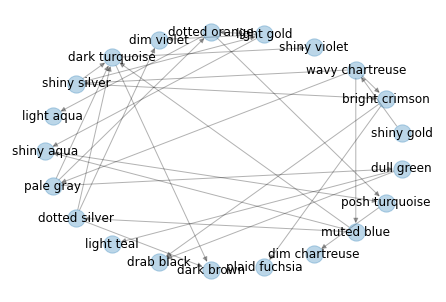

In [104]:
g2 = nx.DiGraph(mybagsubtree)
g2.remove_node('other')
#layout = nx.planar_layout(g2) # not planar!
layout = nx.shell_layout(g2) # not planar!
#layout = nx.spring_layout(g2)
nx.draw(g2, pos = layout, alpha = .3)
nx.draw_networkx_labels(g2, pos=layout)
plt.show()

# Let's color it by steps from root (unweighted, i.e. BFS depth)



In [ ]:
# Ok... maybe I'm getting too fancy here. I think the "work back from the leaves" Idea was correct, but it might be sort of
# a pain in the ass to accomplish...
# I think I just need to put the accumulator on the edges again, and only accumulate nodes where we have the weights....

# yeah, fuck this. This is still too complicated. 
# I think the easiest approach here will be to just literally construct my "bag" as a tree according to the rules
# encoded in the graph, and count how many bags are in it is I go.
# ... which is ultimately going to be equivalent to taking the cumulative edge product along each outgoing path

# Old Code

In [ ]:
class BagGraphTraversable(BagGraphByColors):
    def traverse(self, color):
        queue = self.g[color]
        next_layer = []
        acc = 0
        src = color
        while queue:
            tgt = queue.pop()
            acc += bg.g.edges(data=True)[]['k']

In [ ]:
# It was sort of accidental, but I actually have "is terminal node" as a node itself: "other". 
# If I look at the immediate parents of this node, I'll have all of the leaves of this tree.
# I can then query the graph for the shortest path to each respective leaf (accounting for edge weight), 
# and calculate the shortest path to any leaf as my solution

In [53]:
bg.g.edges.data('k')#['shiny gold']

OutEdgeDataView([('light salmon', 'dotted olive', '5'), ('light salmon', 'wavy lavender', '4'), ('dotted olive', 'dark brown', '5'), ('wavy lavender', 'dull lime', '1'), ('dark purple', 'striped maroon', '5'), ('dark purple', 'wavy maroon', '1'), ('striped maroon', 'shiny white', '5'), ('wavy maroon', 'mirrored fuchsia', '5'), ('wavy maroon', 'dim olive', '5'), ('muted lime', 'drab lavender', '4'), ('muted lime', 'clear orange', '1'), ('muted lime', 'striped black', '2'), ('drab lavender', 'striped tomato', '3'), ('drab lavender', 'bright brown', '1'), ('clear orange', 'bright cyan', '3'), ('clear orange', 'dull lavender', '1'), ('striped black', 'vibrant purple', '2'), ('striped black', 'vibrant salmon', '4'), ('striped black', 'clear gold', '2'), ('striped black', 'shiny yellow', '3'), ('light green', 'dull gray', '5'), ('light green', 'dark crimson', '3'), ('dull gray', 'posh orange', '4'), ('dull gray', 'shiny gold', '3'), ('dull gray', 'dim tomato', '1'), ('dull gray', 'bright cri

In [56]:
# lol, fuck that.
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.dag_to_branching.html

from networkx.algorithms.dag import dag_to_branching, descendants
paths = dag_to_branching(mybagsubtree)

In [68]:
len(paths), len(nodes)

(68, 22)

In [67]:
#len(paths)
paths.nodes(data=True)
#paths.nodes(data=True)['eb520c12-39ee-11eb-bd64-60f262a82202'] # {'source': 'shiny gold'}

NodeDataView({'eb520c12-39ee-11eb-bd64-60f262a82202': {'source': 'shiny gold'}, 'eb520c13-39ee-11eb-8597-60f262a82202': {'source': 'wavy chartreuse'}, 'eb520c14-39ee-11eb-be29-60f262a82202': {'source': 'muted blue'}, 'eb520c15-39ee-11eb-9c0f-60f262a82202': {'source': 'shiny aqua'}, 'eb520c16-39ee-11eb-b462-60f262a82202': {'source': 'posh turquoise'}, 'eb520c17-39ee-11eb-8f83-60f262a82202': {'source': 'dim chartreuse'}, 'eb520c18-39ee-11eb-bab5-60f262a82202': {'source': 'other'}, 'eb520c19-39ee-11eb-a033-60f262a82202': {'source': 'dark turquoise'}, 'eb520c1a-39ee-11eb-ac49-60f262a82202': {'source': 'shiny violet'}, 'eb520c1b-39ee-11eb-8e07-60f262a82202': {'source': 'other'}, 'eb520c1c-39ee-11eb-b8ef-60f262a82202': {'source': 'dark brown'}, 'eb520c1d-39ee-11eb-a88f-60f262a82202': {'source': 'other'}, 'eb520c1e-39ee-11eb-b543-60f262a82202': {'source': 'dotted silver'}, 'eb520c1f-39ee-11eb-99e1-60f262a82202': {'source': 'dark brown'}, 'eb520c20-39ee-11eb-87e3-60f262a82202': {'source': 'oth

In [ ]:

        
        
    def _add_node(self, color, k=1):
        assert color not in self.g
        bags_collection = self.bags_by_color[color]
        self.g.add_node(color, k=k)
    def update_color(self, color, k=1):
        if color not in self.g:
            self._add_node(color, k=k)
        else:
            self.g.nodes(data=True)['color']['k'] += k
